# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

**Before starting with this lab, here is a quick reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating).**

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [4]:
parties = sorted(training_data['party'].unique())    # ascending
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

*TODO: Enter your summary here*

In [6]:
x_tr = training_data["party"].unique()
y_tr = training_data["party"].value_counts()
x_tst = test_data["party"].unique()
y_tst = test_data["party"].value_counts()
r_tr = np.arange(len(y_tr))
r_tst = [x + 0.25 for x in r_tr]

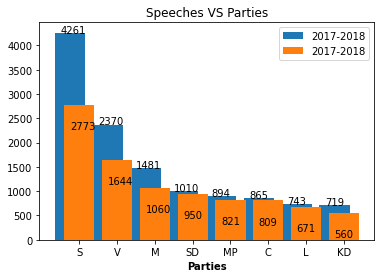

In [7]:
plt.bar(r_tr, y_tr, label='2017-2018')
for index, value in enumerate(y_tr):
    plt.text(index-0.25,value,  str(value))
plt.bar(r_tst, y_tst, label='2017-2018')
for index, value in enumerate(y_tst):
    plt.text(index,value-500,  str(value))  # the location offset
plt.xlabel('Parties', fontweight='bold')
plt.xticks([r+0.25 for r in range(len(y_tr))], x_tr)
plt.title("Speeches VS Parties")
plt.legend()

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [8]:
# TODO: Write code here to train and evaluate a Multinomial Naive Bayes classifier

In [9]:
# the raw way  ####    dont have to run
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer()  
#vectorizer=TfidfVectorizer() #  poor results

#----------------------------------------------------
vectorizer.fit(training_data["words"])
# data
X_train = vectorizer.transform(training_data["words"])
y_train = training_data["party"]

X_test = vectorizer.transform(test_data["words"])
y_test = test_data["party"] 
nbClassifier = MultinomialNB()
nbClassifier.fit(X_train, y_train)
stdPreds = nbClassifier.predict(X_test)
np.sum(stdPreds == y_test) / len(y_test)

0.4280792420327304

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [11]:
pipe =Pipeline( [("CountVectorizer", CountVectorizer()), ("MultinomialNB", MultinomialNB())])
#pipe =Pipeline( [("TfidfVectorizer", TfidfVectorizer()), ("MultinomialNB", MultinomialNB())])   ## poor result

In [12]:
X_train, y_train = training_data.drop(["id","party"], axis=1), training_data["party"]
X_test, y_test = test_data.drop(["party"], axis=1), test_data["party"]

In [13]:
pipe.fit(X_train["words"], y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [14]:
pipe.score(X_train["words"], y_train)

0.7600259256258608

In [15]:
pipe.score(X_test["words"], y_test)

0.4280792420327304

In [16]:
pred_tr = pipe.predict(X_train["words"])
pred_tst = pipe.predict(X_test["words"])

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_train, pred_tr, target_names=parties))

              precision    recall  f1-score   support

           C       0.98      0.45      0.62       865
          KD       0.98      0.33      0.49       743
           L       1.00      0.36      0.53       719
           M       0.62      0.95      0.75      2370
          MP       0.89      0.64      0.74      1481
           S       0.74      0.96      0.84      4261
          SD       0.96      0.59      0.73      1010
           V       0.95      0.66      0.78       894

    accuracy                           0.76     12343
   macro avg       0.89      0.62      0.69     12343
weighted avg       0.82      0.76      0.74     12343



In [19]:
print(classification_report(y_test, pred_tst, target_names=parties))

              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



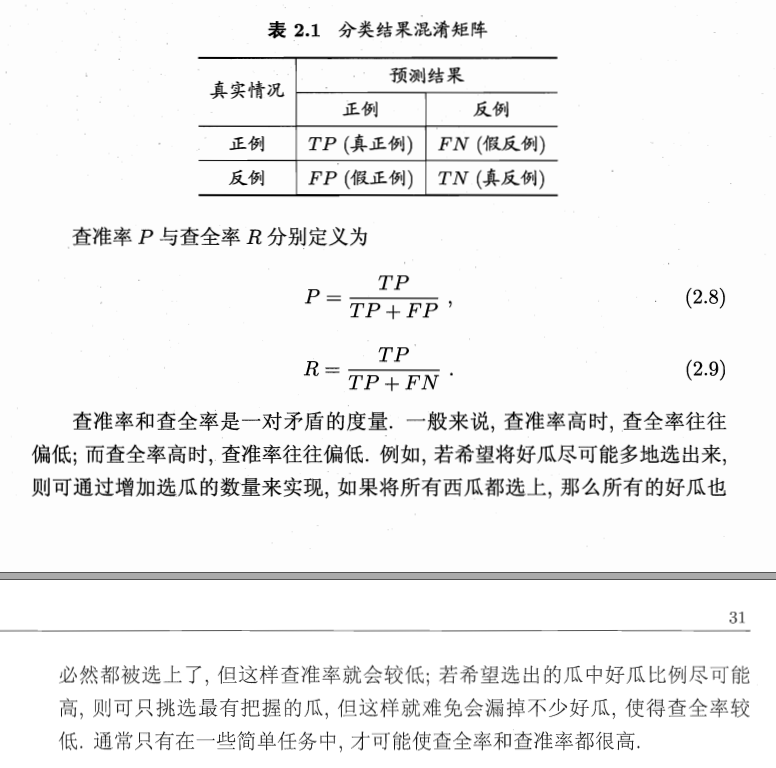

https://en.wikipedia.org/wiki/Precision_and_recall

Would you have expected the results that you got?

the overall accuracy is less than a half; and the 

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [ ]:
# TODO: Write code here to evaluate the random baseline

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
dummy_clf = DummyClassifier(strategy="stratified",random_state =202111)
dummy_clf.fit(X_train["words"], y_train)
dummy_clf.predict(X_test["words"])
dummy_clf.score(X_test["words"], y_test)

0.18130921619293713

An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [22]:
# TODO: Write code here to print the accuracy of the most frequent class baseline

In [23]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train["words"], y_train)
dummy_clf.predict(X_test["words"])
dummy_clf.score(X_test["words"], y_test)

0.298557278208441

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [24]:
# TODO: Write code here to implement undersampling

In [30]:
#from sklearn.utils import class_weight
#from random import sample
#from random import seed
labs = np.unique(y_train)  # labels
lower_size=training_data["party"].value_counts()[-1]

#seed(202111)
balanced_train = pd.DataFrame()
for lab in labs:
    #party = training_data[training_data["party"]==lab]
   # sp_party = sample(party,lower_size)  # default ,replace=False
    balanced_train = balanced_train.append(training_data[training_data["party"]==lab].sample(lower_size, replace=False, random_state=202111))
    #balanced_train =balanced_train.append(sp_party)

balanced_train.shape

(5752, 3)

In [31]:
pipe.fit(balanced_train["words"], balanced_train["party"])
pred_p4 = pipe.predict(X_test["words"])
pipe.score(X_test["words"], y_test)

0.400947459086994

In [32]:
print(classification_report(y_test, pred_p4, target_names=parties))

              precision    recall  f1-score   support

           C       0.27      0.45      0.34       671
          KD       0.29      0.42      0.35       821
           L       0.27      0.44      0.33       560
           M       0.40      0.49      0.44      1644
          MP       0.36      0.33      0.34       809
           S       0.78      0.29      0.42      2773
          SD       0.45      0.39      0.42      1060
           V       0.39      0.57      0.46       950

    accuracy                           0.40      9288
   macro avg       0.40      0.42      0.39      9288
weighted avg       0.49      0.40      0.40      9288



In [33]:
###　the way about sample weight, it does not work in the case, don't have to run

class_weight_calc = class_weight.compute_class_weight(class_weight='balanced',classes=labs, y=y_train)
weights_of_class={labs[i]:v for i, v in enumerate(class_weight_calc)}
#weights_of_class
#https://github.com/scikit-learn/scikit-learn/issues/18159
#pipe.fit(X_train["words"], y_train, class_weight=weights_of_class)  #---------------------------------------
#pred_p4 = pipe.predict(X_train["words"])
#pipe.score(X_test["words"], y_test)

*TODO: Enter the summary of your results here*

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). If you would rather see a visual representation, you can also use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

In [141]:
# TODO: Write code here to solve Problem 5

In [34]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

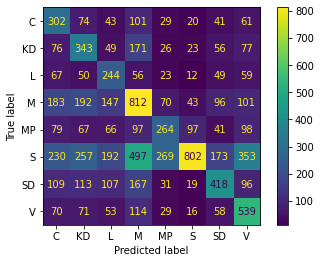

In [35]:
 ConfusionMatrixDisplay.from_predictions(y_test, pred_p4)

In [36]:
cm = pd.DataFrame(confusion_matrix(y_test, pred_p4), index=parties, columns=parties)
cm

,C,KD,L,M,MP,S,SD,V
C,302,74,43,101,29,20,41,61
KD,76,343,49,171,26,23,56,77
L,67,50,244,56,23,12,49,59
M,183,192,147,812,70,43,96,101
MP,79,67,66,97,264,97,41,98
S,230,257,192,497,269,802,173,353
SD,109,113,107,167,31,19,418,96
V,70,71,53,114,29,16,58,539


In [37]:
cm1=np.array(cm)
cm1

array([[302,  74,  43, 101,  29,  20,  41,  61],
       [ 76, 343,  49, 171,  26,  23,  56,  77],
       [ 67,  50, 244,  56,  23,  12,  49,  59],
       [183, 192, 147, 812,  70,  43,  96, 101],
       [ 79,  67,  66,  97, 264,  97,  41,  98],
       [230, 257, 192, 497, 269, 802, 173, 353],
       [109, 113, 107, 167,  31,  19, 418,  96],
       [ 70,  71,  53, 114,  29,  16,  58, 539]], dtype=int64)

In [38]:
 # the second biggest
{cm.columns[i]:cm.columns[cm1[i,].argsort()[-2]] for i in range(8)}

{'C': 'M',
 'KD': 'M',
 'L': 'C',
 'M': 'KD',
 'MP': 'V',
 'S': 'M',
 'SD': 'M',
 'V': 'M'}

Take a minute to reflect on whether your results make sense.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [ ]:
# TODO: Write code here to implement the grid search

In [39]:
# <component>__<parameter> 
parameters = {  
    "CountVectorizer__ngram_range": [(1,1), (1,2)],
    "CountVectorizer__binary": [True, False],
    "MultinomialNB__alpha": [1,0.1]   
}


In [40]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=parameters, cv=5, verbose=1)
grid.fit(training_data["words"], training_data["party"])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                       ('MultinomialNB', MultinomialNB())]),
             param_grid={'CountVectorizer__binary': [True, False],
                         'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
                         'MultinomialNB__alpha': [1, 0.1]},
             verbose=1)

In [41]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_CountVectorizer__binary,param_CountVectorizer__ngram_range,param_MultinomialNB__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.448434,0.043717,0.630616,0.059327,True,"(1, 1)",1,"{'CountVectorizer__binary': True, 'CountVector...",0.474686,0.468206,0.472256,0.474878,0.455024,0.469010,0.007395,6
1,2.478003,0.203841,0.616393,0.025670,True,"(1, 1)",0.1,"{'CountVectorizer__binary': True, 'CountVector...",0.591738,0.622924,0.598623,0.564019,0.546191,0.584699,0.026889,2
2,7.942792,0.092261,1.975020,0.064077,True,"(1, 2)",1,"{'CountVectorizer__binary': True, 'CountVector...",0.397327,0.388821,0.396922,0.410454,0.390194,0.396744,0.007668,8
3,8.005925,0.152659,2.043592,0.165659,True,"(1, 2)",0.1,"{'CountVectorizer__binary': True, 'CountVector...",0.575132,0.575537,0.587282,0.553890,0.544976,0.567363,0.015535,4
4,2.814750,0.373771,0.645400,0.061803,False,"(1, 1)",1,"{'CountVectorizer__binary': False, 'CountVecto...",0.515188,0.509923,0.522074,0.499595,0.485818,0.506520,0.012690,5
5,2.826261,0.319838,0.636440,0.036498,False,"(1, 1)",0.1,"{'CountVectorizer__binary': False, 'CountVecto...",0.603483,0.625354,0.592143,0.563614,0.545381,0.585995,0.028437,1
6,8.243876,0.100717,2.232415,0.204480,False,"(1, 2)",1,"{'CountVectorizer__binary': False, 'CountVecto...",0.420818,0.404617,0.409072,0.419773,0.402755,0.411407,0.007549,7
7,8.662325,0.179854,2.079018,0.092824,False,"(1, 2)",0.1,"{'CountVectorizer__binary': False, 'CountVecto...",0.582827,0.602673,0.596193,0.559968,0.567261,0.581784,0.016321,3


In [42]:
grid.best_params_

{'CountVectorizer__binary': False,
 'CountVectorizer__ngram_range': (1, 1),
 'MultinomialNB__alpha': 0.1}

In [43]:
pred_p6 = grid.best_estimator_.predict(X_test["words"])
print(classification_report(y_test, pred_p6))

              precision    recall  f1-score   support

           C       0.39      0.27      0.32       671
          KD       0.45      0.24      0.31       821
           L       0.37      0.26      0.30       560
           M       0.44      0.58      0.50      1644
          MP       0.32      0.46      0.38       809
           S       0.61      0.65      0.63      2773
          SD       0.49      0.43      0.45      1060
           V       0.50      0.42      0.46       950

    accuracy                           0.48      9288
   macro avg       0.45      0.41      0.42      9288
weighted avg       0.48      0.48      0.48      9288



## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.

In [44]:
# TODO: Write code here to search for a better model and print the results

In [45]:
# no support on swedish
#import spacy
#nlp = spacy.load("sv_core_web_sm")
#Swedish	sv	lang/sv	none yet
# so get nltk

In [46]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [47]:
def preprocess(piece):
    
    tokens = word_tokenize(piece)
    ## convert to lower case
    tokens = [w.lower() for w in tokens] 
    # prepare regex for char filtering 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word 
    stripped = [re_punc.sub('', w) for w in tokens] 
    # remove remaining tokens that are not alphabetic 
    words = [w for w in stripped if w.isalpha()] 
    # do the stemization
    stemmer = SnowballStemmer("swedish")
    words = [stemmer.stem(w) for w in words] 
    #filter out stop words 
    stop_words = set(stopwords.words('swedish')) 
    words = [w for w in words if not w in stop_words] 
    
    return words
    

In [48]:
###preprocess0(X_train["words"][3])

In [51]:
###r0=preprocess(X_train["words"][3])
###X_train["words"][0:2]                

In [52]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import string
# define stemmer will be used in preprocessing
stemmer = SnowballStemmer("swedish")
# define punctuation table
table = str.maketrans('', '', string.punctuation)
# define stopwords
stopwords_sw = set(stopwords.words("swedish"))

def preprocess1(text):
    words = []
    for t in word_tokenize(text):
        t_ = t.lower().translate(table)
        if(not t_ in stopwords_sw and t_.isalpha()):
            words.append(stemmer.stem(t_))
    return(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
from sklearn.model_selection import cross_val_score
CV = 6
countVectorizer = CountVectorizer(tokenizer=preprocess)
pipe =Pipeline( [("CountVectorizer", countVectorizer), ("MultinomialNB", MultinomialNB())])
#pipe.fit(X_train["words"], y_train)
#pred = pipe.predict(X_test["words"])
# classification_report(y_test, pred)
cross_val_score(pipe,    training_data["words"], 
                             training_data["party"], 
                             scoring="accuracy", cv=CV, 
                             verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.0s finished


array([0.52380952, 0.50607681, 0.52260574, 0.50899368, 0.49829849,
       0.48420029])

In [73]:
def model_kpi(pipe,CV):
    res = cross_val_score(pipe,  training_data["words"], 
                                 training_data["party"], 
                                 scoring="accuracy", cv=CV, 
                                 verbose=1)
    return res
    
    
res_MultinomialNB = model_kpi(pipe,6)    
res_MultinomialNB
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.9s finished


array([0.52380952, 0.50607681, 0.52260574, 0.50899368, 0.49829849,
       0.48420029])

In [65]:
from sklearn.linear_model import LogisticRegression
pipe1=Pipeline([("countVectorizer", countVectorizer), 
               ("LogisticRegression_classifier", LogisticRegression(random_state=202111, 
                                                 multi_class="multinomial", 
                                                 solver="lbfgs", 
                                                 max_iter=1000))])
res_LogisticRegression=model_kpi(pipe1,6)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.6min finished


array([0.60932945, 0.6110841 , 0.6110841 , 0.57267866, 0.57462324,
       0.54739912])

In [72]:
#import xgboost as xgb
from xgboost import XGBClassifier

#xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=202111)

pipe_xgboost=Pipeline([("countVectorizer", countVectorizer), 
               ("XGBClassifier", XGBClassifier(objective="multi:softprob",use_label_encoder =False,random_state=202111))])

pipe_xgboost.fit(X_train["words"], y_train)
pred = pipe_xgboost.predict(X_test["words"])
print(classification_report(y_test, pred))

#-------------------------------------------------------------
# https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn

C:\Users\Administrator\.julia\conda\3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           C       0.51      0.41      0.45       671
          KD       0.65      0.28      0.39       821
           L       0.54      0.41      0.47       560
           M       0.50      0.50      0.50      1644
          MP       0.37      0.31      0.34       809
           S       0.49      0.83      0.62      2773
          SD       0.59      0.30      0.40      1060
           V       0.63      0.30      0.41       950

    accuracy                           0.51      9288
   macro avg       0.54      0.42      0.45      9288
weighted avg       0.53      0.51      0.49      9288



In [70]:
res_xgboost = model_kpi(pipe_xgboost,6) 
res_xgboost

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Administrator\.julia\conda\3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:54:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\.julia\conda\3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\.julia\conda\3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\.julia\conda\3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\.julia\conda\3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\.julia\conda\3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.6min finished


array([0.60301263, 0.60525036, 0.61205639, 0.61059796, 0.60768109,
       0.58045698])

In [78]:
# Non-linear SVM is quite slow and with similar results
from sklearn.svm import LinearSVC

pipe_LinearSVM=Pipeline([("countVectorizer", countVectorizer), 
               ("classifier", LinearSVC(max_iter=10000))])

pipe_LinearSVM.fit(X_train["words"], y_train)
pred = pipe_LinearSVM.predict(X_test["words"])
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           C       0.36      0.35      0.36       671
          KD       0.38      0.22      0.28       821
           L       0.31      0.33      0.32       560
           M       0.46      0.47      0.46      1644
          MP       0.28      0.39      0.32       809
           S       0.56      0.66      0.60      2773
          SD       0.42      0.35      0.39      1060
           V       0.48      0.29      0.36       950

    accuracy                           0.45      9288
   macro avg       0.41      0.38      0.39      9288
weighted avg       0.45      0.45      0.44      9288



In [ ]:
### it is better to try deep learning models, but the reuquirement in time and machine is a little high
# so keras

# https://www.tensorflow.org/text/tutorials/text_classification_rnn

## Reflection questions

The following reflection questions are questions that you could be asked in the oral exam. Try to answer each of them in the form of a short text and enter it in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 2.1:** Summarise the results of your experiments for Problem&nbsp;2. Are your results ‘good’ or ‘bad’? How do you determine that?

**RQ 2.2:** Summarise the results of your experiments for Problem&nbsp;4. Would you think that your results are typical even for other classification tasks? How would *oversampling* have looked like for this task? When would you use undersampling, when oversampling?

**RQ 2.3:** Which model performed best in your experiments for Problem&nbsp;6? Why is it important to do a hyperparameter search before drawing conclusions about the performance of a model? Why is it often not done, anyway? Why should you never tune hyperparameters on the test set?

*TODO: Enter your answers here*

**Congratulations on finishing L2! 👍**